# <span style="color:#0073C0">Demonstration 1: Measuring the speed of sound</span>

This demonstration involves determining the speed of longitudinal sound waves in various materials by measuring the length of time required for a wave to travel from end-to-end along a rod of known length. 

For materials with well-defined properties, the values obtained experimentally can be verified using the equation for speed of sound in a solid material, $c = \sqrt{\frac{E}{\rho}}$, where $E$ is elastic modulus (typically in units of $\mathrm{Pa}$) and $\rho$ is material density (typically in units of $\mathrm{kg/m^3}$). 

## Background theory
Before undertaking this demonstration, you should be familiar with the material covered in Learning Module 5 and Chapter 3 of the Course Notes.

As derived in Section 3.2 of the Course Notes, we know that the wave equation for longitudinal waves is given by:
$$ \frac{\partial^2 u}{\partial t^2} = \frac{E}{\rho} \frac{\partial^2 u}{\partial x^2}$$

where 
$$c = \sqrt{\frac{E}{\rho}}$$ 
is the speed of sound in solid material.

A visualisation of longitudinal waves can be observed by running the cell below:

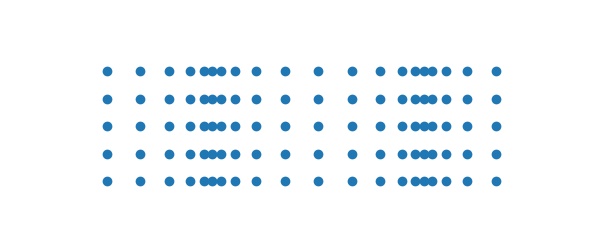

In [1]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# If interested, you can look 'inside' how this animation was generated 
# in more detail in the HelperFunctions package.
from HelperFunctions import create_grid_pos, longitudinal_travelling_wave, update

# Generate base grid
x_size = 20
y_size = 5
x_pos, y_pos = create_grid_pos(x_size=x_size, y_size=y_size)

# Select frames for a complete wave cycle, and total number of frames.
frames_per_cycle = 100
num_frames = 400

# Generate longitudinal wave data
x_long, y_long = longitudinal_travelling_wave(x_pos, y_pos, frames_per_cycle=frames_per_cycle,
                                   wave_len=10, amplitude=1, num_frames=num_frames)

# interval between two video frames (given in ms)
frames_per_seconds = 30
interval = 1000/frames_per_seconds

# Plot and animate
fig_long, ax_long = plt.subplots()
fig_long.set_size_inches(6,2.5)
plt.axis('off')
ax_long.set_xlim([-1.5, x_size + 0.5])
ax_long.set_ylim([-1.5, y_size + 0.5])
# TODO: red dots on one vertical
scat_long = ax_long.scatter(x_long[0,:,:], y_long[0,:,:])

ani_long = animation.FuncAnimation(fig_long, update, frames=num_frames,
                                   fargs=(scat_long, x_long, y_long), interval=interval)

## Demonstration setup

A representative diagram of the experimental setup for this demonstration is shown in Figure 1.

<p align="center">
    <img src="Demo_1_Setup.png" width="300"> 
</p>
<p></p>
<center>Figure 1: Experimental setup for demonstration 1</center>

## Methods

1. Set up  equipment in the configuration shown above (remembering to place the microphone and rod on the little rubber mats).

2. Test microphone is working by making a noise and observing change in oscilloscope trace.

3. Using a "beater", hit one end of the rod in question in the longitudinal direction. This will send a sound wave towards the microphone end.

4. Once the sound wave reaches the microphone end, a peak in the oscilloscope trace is observed. The sound wave is then reflected and travels back to where it started, before again reflecting towards the microphone end again. So, the time difference between peaks is the time required for a sound wave to travel two times the length of the rod.

5.  Calculate the speed of sound for the given material, using $c = \frac{2L}{\Delta t}$ where $L$ is the known length of rod and $\Delta t$ is the time difference between observed peaks of oscilloscope trace. A more accurate value for $\Delta t$ can be found by measuring the average value across a large number of peaks (e.g. 10).


## Results

Edit the cell below with the measured time between peaks.

To ensure that it is working correctly, run the cell and check the table which has been output.

In [2]:
import pandas as pd
import numpy as np
from itables import show

# Description of terms used in material_data and material_df:
# "material":  material of the rod used
# "E":         known Young's modulus of the material (unit: GPa)
# "rho":       known density of the material (unit: kg/m^3)
# "L":         length of rod (unit: m)
# "del_t":     measured time between microphone reading peaks (unit: s)
# "v_th":      theoretical speed of sound in rod based on material properties (unit: m/s)
# "v_meas":    measured speed of sound in rod based on time between peaks (unit: m/s)

material_data = {
    "material":     ["steel",   "steel",   "steel",   "al",      "al",      "copper",  "brass",   "wood",    "PVC",     "acrylic",  "glass"],
    "E":            [200,       200,       200,       70,        70,        130,       100,       10,        3.5,       3,          70],
    "rho":          [7850,      7850,      7850,      2700,      2700,      8960,      8500,      700,       1380,      1180,       2500],
    "L":            [0.1,       0.2,       0.4,       0.1,       0.2,       0.1,       0.1,       0.2,       0.2,       0.2,        0.2],
    # EDIT LINE BELOW
    "del_t":        [0.00e-00,  8.16e-05,  0.00e-00,  0.00e-00,  7.76e-05,  5.18e-05,  0.00e-00,  8.20e-05,  1.75e-04,  1.86e-04,   7.46e-05]
}

# load data into a DataFrame object:
material_df = pd.DataFrame(material_data)

# calculate theoretical speed of sound based on material properties
material_df["v_th"] = round(np.sqrt(material_df["E"]*10**9/material_df["rho"]), 1)

# calculate measured speed of sound based on rod length and time between peaks
material_df["v_meas"] = round(2*material_df["L"]/material_df["del_t"], 1)

# print DataFrame to terminal
show(material_df)

## Analysis

We can now plot and compare the obtained results using the cell below.

Questions to think about: 
- Why are there differences in the speed of sound measured in each material?
- Why are there differences between the theoretical and measured speed of sound?

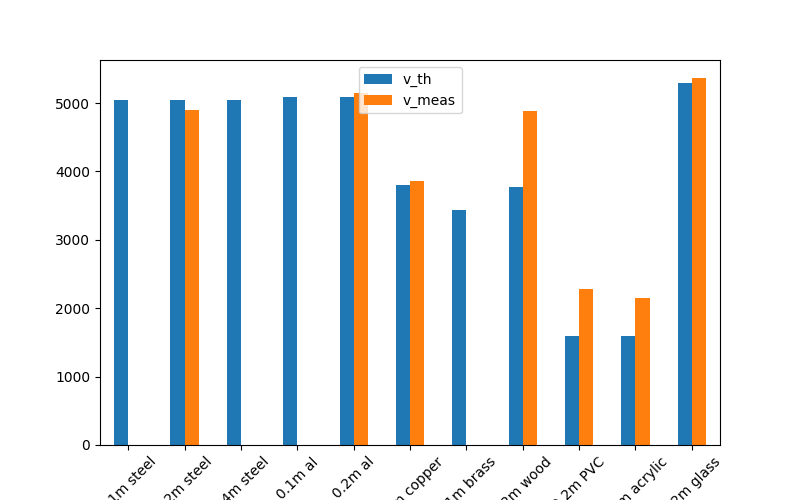

In [3]:
import matplotlib.pyplot as plt

material_df["bar labels"] = [f"{material_data['L'][idx]}m {mat}" for idx, mat in enumerate(material_data["material"])] 
ax = material_df.plot.bar(x="bar labels", y=["v_th", "v_meas"], rot=45, figsize = (8, 5))